<a href="https://colab.research.google.com/github/yashikart/add_colour/blob/main/add_colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


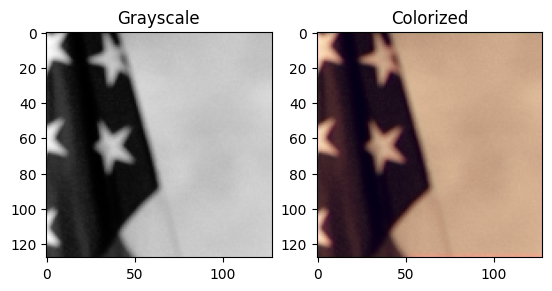

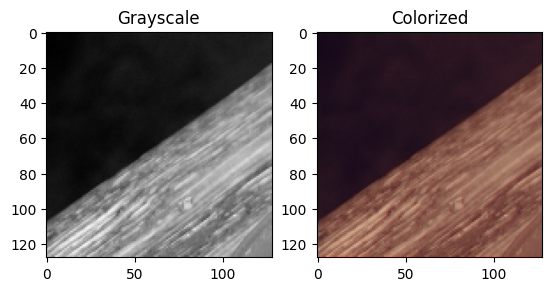

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from skimage.color import rgb2lab, lab2rgb
from skimage import data
import matplotlib.pyplot as plt

# ✅ Load sample images from skimage (built-in)
img1 = data.astronaut()[:128, :128] / 255.0
img2 = data.coffee()[:128, :128] / 255.0
X = np.array([img1, img2], dtype=np.float32)

# Convert RGB → Lab
lab = np.array([rgb2lab(img) for img in X])
L = lab[:,:,:,0:1] / 100.0       # Lightness channel (input)
ab = lab[:,:,:,1:3] / 128.0      # Color channels (target)

# ✅ Very small CNN
model = models.Sequential([
    layers.Input(shape=(128,128,1)),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.Conv2D(2, 3, activation='tanh', padding='same')
])
model.compile(optimizer='adam', loss='mse')

# Train (quickly, just demo)
model.fit(L, ab, epochs=30, verbose=0)

# Predict colorization
pred_ab = model.predict(L)
for i in range(len(L)):
    lab_out = np.zeros((128,128,3))
    lab_out[:,:,0] = L[i,:,:,0]*100
    lab_out[:,:,1:] = pred_ab[i]*128
    rgb_out = np.clip(lab2rgb(lab_out), 0, 1)
    plt.subplot(1,2,1); plt.imshow(L[i].squeeze(), cmap='gray'); plt.title("Grayscale")
    plt.subplot(1,2,2); plt.imshow(rgb_out); plt.title("Colorized")
    plt.show()
